In [6]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings("ignore")

In [7]:
print(sklearn.__version__)

0.24.2


In [8]:
print(np.__version__)

1.21.2


In [9]:
print(pd.__version__)

1.3.2


In [16]:
data_1 = np.array([[random.randint(1,400) for i in range(2)] for j in range(50)], dtype=np.float64)

data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], dtype=np.float64)

data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], dtype=np.float64)

data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

In [17]:
data.shape

(150, 2)

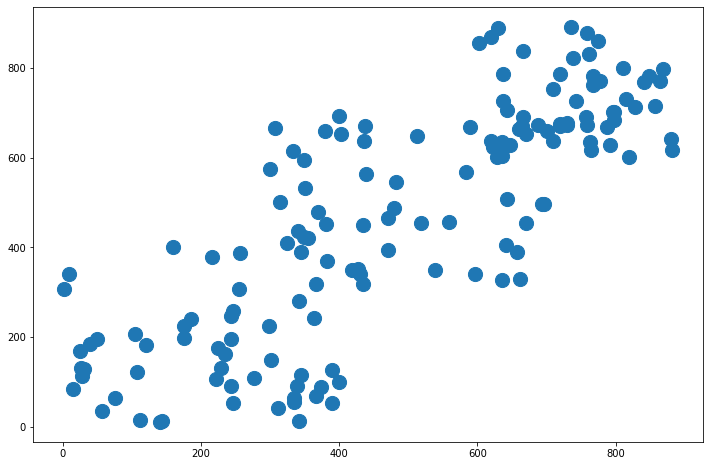

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(data[:,0], data[:,1], s=200)

In [19]:
# Now let's assign labels to each set of 50 points
labels_1 = np.array([0 for i in range(50)])

labels_2 = np.array([1 for i in range(50)])

labels_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)

In [20]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})

df.sample(10)

,data_x,data_y,labels
130,738.0,822.0,2
18,383.0,370.0,0
117,666.0,837.0,2
25,28.0,112.0,0
24,298.0,224.0,0
75,666.0,691.0,1
11,373.0,89.0,0
69,665.0,670.0,1
43,243.0,196.0,0
31,363.0,242.0,0


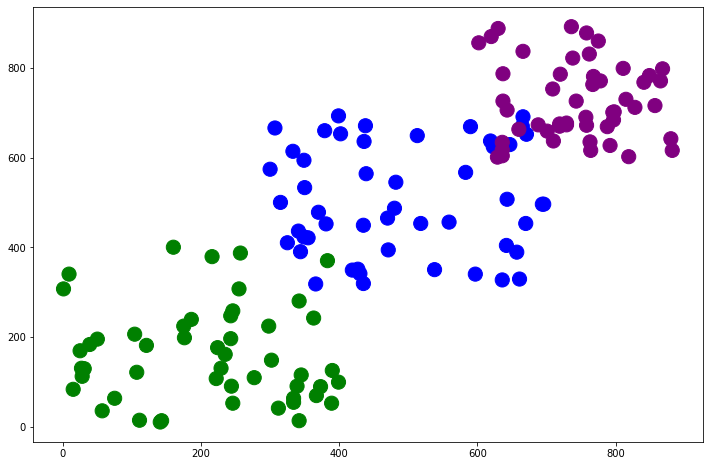

In [23]:
# a slightly different visualization of data

colors = ['green', 'blue', 'purple']

plt.figure(figsize=(12,8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors))

In [26]:
# Instatiate a Kmeans object, specify the number of clusters you want to partition to, and number of iterations
# you want to run. Clustering is performed on the 2-D data that we supplied earlier as numpy array. Calling the
# fit function will perform the clustering on the underlying data.

kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [27]:
kmeans_model.labels_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [28]:
centroids = kmeans_model.cluster_centers_

centroids

array([[730.16949153, 708.69491525],
       [206.04166667, 151.41666667],
       [446.13953488, 473.65116279]])

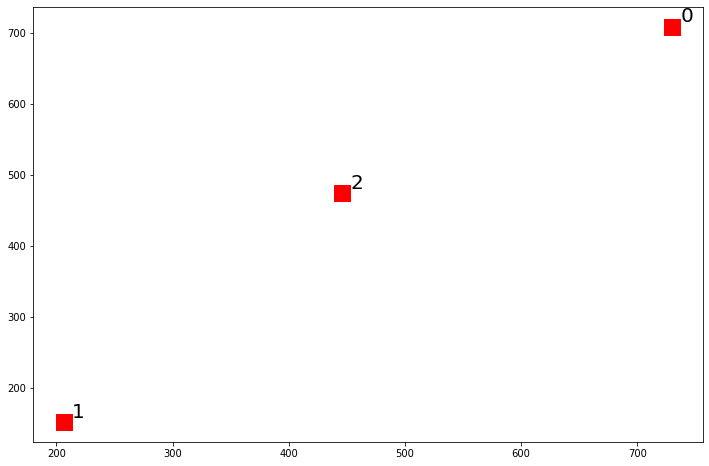

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [31]:
# Now using all the different scores available to figure out the model's performance

# clustering satisfies homegeneity if all of its clusters contains only points which are members of a single class.
# The actual values do not matter i.e. the fact that actual label 1 corresponds to cluster label 2 does not affect
# this score
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))

# Clustering satisfies completeness if all the points that are members of the same class belong to the same cluster.
print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))

# Homegeneity score and completeness score aren't exactly the same, though their values will probably be very close

# Harmonic mean of homegeneity and completeness score - usually used to find the average of rates
print("v_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))

# close to 0: data was randomly labeled
# exactly 1: actual and predicted clusters are identical
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))

# Information obtained about one random variable by observing another random variable adjusted to account for chance
# close to 0: data was randomly labeled
# exactly 1: actual and predicted clusters are identical
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))


# Original labels are not required to evaluate
# Uses a distance metric to measure how similar a point is to its own cluster and how dissimilar the point is from 
# points in other clusters
# Ranges between -1 and 1 and positive values closer to 1 indicate that the clustering was good
print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.7980033906096424
Completeness_score:  0.804449615425305
v_measure_score:  0.8012135373285526
Adjusted_rand_score:  0.798822345639388
Adjusted_mutual_info_score:  0.7987146505067181
Silhouette_score:  0.5122599631077697


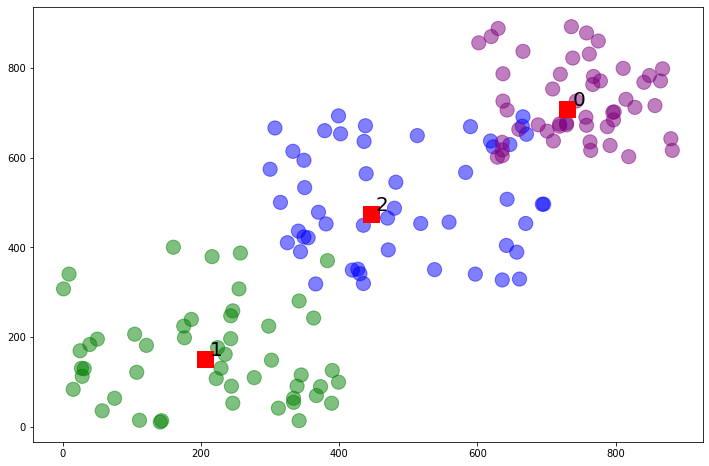

In [33]:
colors = ['green', 'blue', 'purple']

plt.figure(figsize=(12,8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors),
           alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)


In [34]:
data_test = np.array([[442., 621.],
                    [50., 153.],
                    [333., 373.],
                    [835., 816.]])

In [35]:
label_pred = kmeans_model.predict(data_test)

In [37]:
label_pred

array([2, 1, 2, 0], dtype=int32)

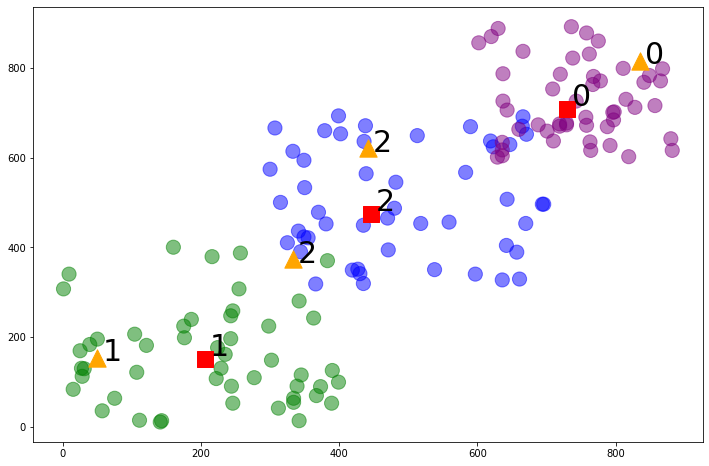

In [38]:
# Let's plot the both datasets together
colors = ['green', 'blue', 'purple']

plt.figure(figsize=(12,8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors),
           alpha=0.5)

plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')

for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize=30)
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [ ]:
# In the plot above, you can notice that centroids have been assigned to a group of data points and some are 
# lying closer to the decision boundary. The ones lying closer to the boundary will be could belong to either
# group, which is assigned based on the score. There is actual prediction and expected prediction that are 
# compared here.